# Regression Model of House Prices' Prediction

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


import warnings
warnings.filterwarnings('ignore')

In [194]:
df = pd.read_csv("kc_house_data.csv")

## EDA Process

In [195]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6348,5422560470,20141203T000000,440000.0,3,2.00,1650,6408,2.0,0,0,...,8,1650,0,1977,0,98052,47.6638,-122.128,1750,6402
10265,224069114,20140829T000000,635000.0,4,2.50,2470,77550,1.0,0,0,...,7,2470,0,1987,0,98075,47.5888,-122.011,2490,40894
13046,8651611590,20140528T000000,840000.0,4,2.50,3420,8405,2.0,0,0,...,10,3420,0,2000,0,98074,47.6328,-122.064,3230,8460
4811,9831200500,20150304T000000,2479000.0,5,3.75,6810,7500,2.5,0,0,...,13,6110,700,1922,0,98102,47.6285,-122.322,2660,7500
12630,522059158,20140616T000000,230000.0,3,1.75,1400,6956,1.0,0,0,...,7,1400,0,1957,0,98031,47.4233,-122.198,1400,9375


In [196]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [197]:
df.shape

(21613, 21)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [199]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [200]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [201]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


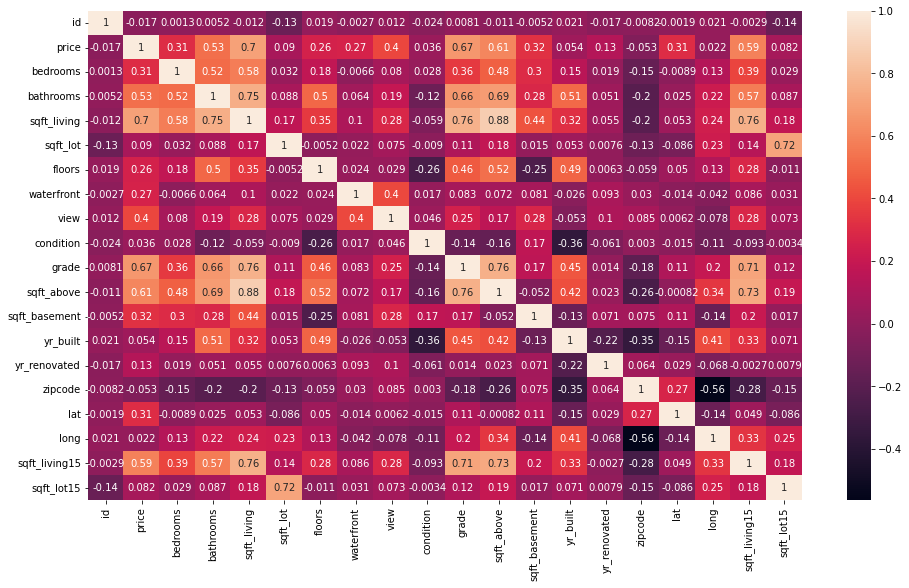

In [202]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True);

In [203]:
#df.drop_duplicates()

### Works on Columns

### Price 

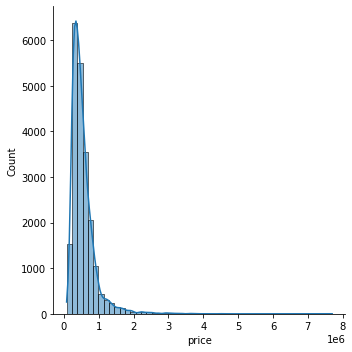

In [204]:
sns.displot(df.price, bins = 50, kde = True)

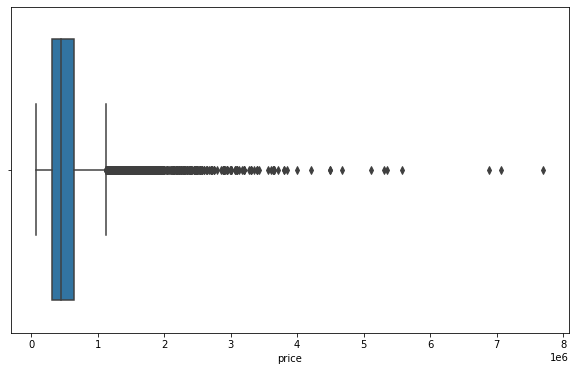

In [205]:
sns.boxplot(x=df.price);    #I can see the outliers here.

In [206]:
df.price.sort_values(ascending=False).head(25)  # detailed high prices

7252     7700000.0
3914     7062500.0
9254     6885000.0
4411     5570000.0
1448     5350000.0
1315     5300000.0
1164     5110800.0
8092     4668000.0
2626     4500000.0
8638     4489000.0
12370    4208000.0
4149     4000000.0
2085     3850000.0
19017    3800000.0
7035     3800000.0
16302    3710000.0
6508     3650000.0
18482    3650000.0
15255    3640900.0
19148    3635000.0
2864     3600000.0
21576    3567000.0
5880     3418800.0
7989     3400000.0
10446    3400000.0
Name: price, dtype: float64

In [207]:
abs(df.corr()["price"]).sort_values(ascending=False) 

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

### Bedrooms

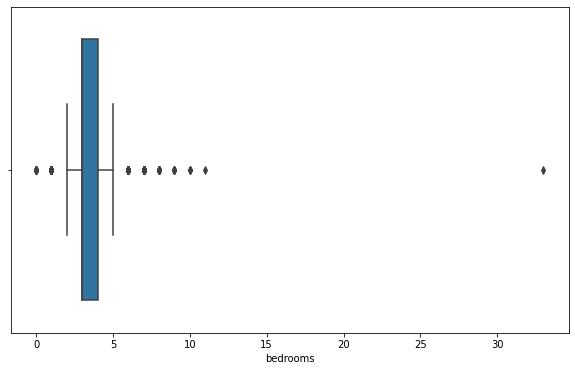

In [208]:
sns.boxplot(x = df.bedrooms);

In [209]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [210]:
df[(df.bedrooms==0)].price.to_frame()

,price
875,1095000.0
3119,380000.0
3467,288000.0
4868,228000.0
6994,1295650.0
8477,339950.0
8484,240000.0
9773,355000.0
9854,235000.0
12653,320000.0


In [211]:
df.drop([875,6994],axis=0,inplace=True)

In [212]:
df.shape

(21611, 21)

### Zipcode

In [213]:
df["zipcode"].nunique()

70

In [214]:
df["zipcode"]=df["zipcode"].astype("object")

### ID 

In [215]:
df["id"].nunique()

21434

In [216]:
df.drop("id", axis = 1,inplace=True)

In [217]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Date

In [218]:
df["date"]=pd.to_datetime(df["date"])
df.date

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21611, dtype: datetime64[ns]

In [219]:
df.yr_built

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21611, dtype: int64

In [220]:
df['age'] = df.date.dt.year - df.yr_built
df.age

0        59
1        63
2        82
3        49
4        28
         ..
21608     5
21609     1
21610     5
21611    11
21612     6
Name: age, Length: 21611, dtype: int64

In [221]:
df["sales_year"] = df.date.dt.year

In [222]:
df.drop("date",axis=1,inplace=True)

In [223]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age', 'sales_year'],
      dtype='object')

In [224]:
df.shape

(21611, 21)

## yr_renovated

In [225]:
#df.yr_renovated.value_counts()

In [226]:
#df[df["yr_renovated"]!=0]

In [227]:
#df.loc[(df.yr_renovated != 0), "yr_renovated"] = 1

In [228]:
#df["renovated"] = df["yr_renovated"].astype(int)

In [229]:
#df["renovated"].value_counts()

In [230]:
#df.drop("yr_renovated",axis=1,inplace=True)

### sqft_living15 and sqft_lot15

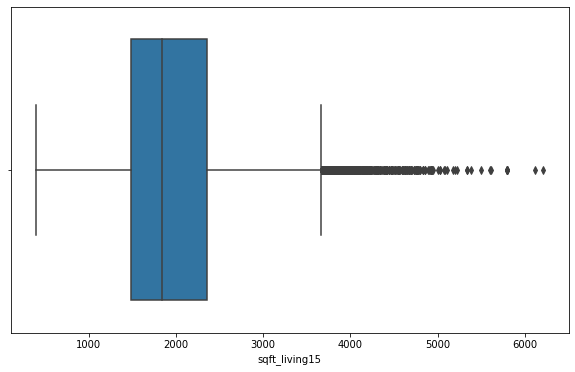

In [231]:
sns.boxplot(df.sqft_living15)

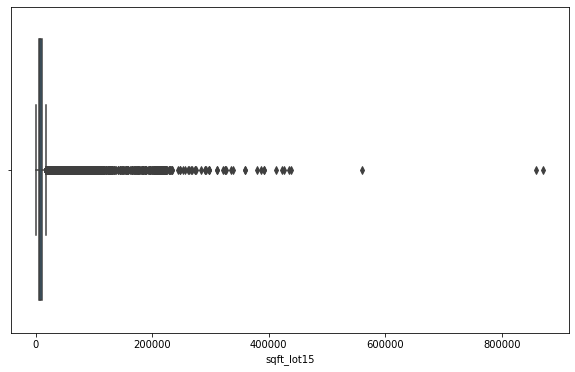

In [232]:
sns.boxplot(df.sqft_lot15)

In [233]:
from seaborn.utils import iqr

list = [df.price,df.bedrooms,df.sqft_living,df.sqft_lot,df.sqft_lot15,df.sqft_living15]

for i in list:
  lowerlim=i.mean() - 2 * iqr(i)
  upperlim=i.mean() + 2 * iqr(i)
  not_out = (i >= lowerlim) & (i <= upperlim)
  df=df[not_out]


In [234]:
df.shape

(15376, 21)

## Modeling

In [235]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [236]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age', 'sales_year', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077'

In [237]:
df.shape

(15376, 89)

In [238]:
x =df.drop(columns="price") 
y = df["price"]   

In [239]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [240]:
x_train.shape,x_test.shape

((12300, 88), (3076, 88))

In [241]:
lr=LinearRegression()

In [242]:
model = lr.fit(x_train,y_train)

In [243]:
y_pred=model.predict(x_test)

In [244]:
(mean_squared_error(y_pred,y_test))**.5

79884.85618072226

In [245]:
r2_score(y_pred,y_test)  #r2 eksi çıkarsa büyük bir hata vardır.

0.8356405697196941

In [246]:
R = Ridge()
L = Lasso()

In [247]:
R.fit(x_train,y_train)
tahmin2=R.predict(x_test)

L.fit(x_train,y_train)
tahmin3=L.predict(x_test)

mean_squared_error(tahmin3,y_test)**.5

r2_score(tahmin3,y_test)

0.8356385209119385

In [248]:
## EXTRA WORKS to CHECK

In [249]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)  

In [250]:
from sklearn.model_selection import cross_validate, cross_val_score
model = LinearRegression()
scores = cross_validate(model, x_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [251]:
scores

{'fit_time': array([0.03393078, 0.03240919, 0.0318222 , 0.03220797, 0.03510547]),
 'score_time': array([0.0015614 , 0.00161171, 0.0015707 , 0.00149512, 0.00181103]),
 'test_r2': array([0.84606814, 0.85855808, 0.85094407, 0.85101304, 0.86375045]),
 'test_neg_mean_absolute_error': array([-58912.20917038, -56966.91684356, -58634.76217154, -59306.91347232,
        -56939.03730927]),
 'test_neg_mean_squared_error': array([-6.70757678e+09, -6.43272277e+09, -6.55182643e+09, -6.67937770e+09,
        -6.05122205e+09]),
 'test_neg_root_mean_squared_error': array([-81899.79716197, -80204.25658552, -80943.35319697, -81727.45991987,
        -77789.60117843])}

In [252]:
scores = pd.DataFrame(scores, index = range(1,6))
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.033931,0.001561,0.846068,-58912.209170,-6.707577e+09,-81899.797162
2,0.032409,0.001612,0.858558,-56966.916844,-6.432723e+09,-80204.256586
3,0.031822,0.001571,0.850944,-58634.762172,-6.551826e+09,-80943.353197
4,0.032208,0.001495,0.851013,-59306.913472,-6.679378e+09,-81727.459920
5,0.035105,0.001811,0.863750,-56939.037309,-6.051222e+09,-77789.601178


In [253]:
scores.iloc[0]

fit_time                            3.393078e-02
score_time                          1.561403e-03
test_r2                             8.460681e-01
test_neg_mean_absolute_error       -5.891221e+04
test_neg_mean_squared_error        -6.707577e+09
test_neg_root_mean_squared_error   -8.189980e+04
Name: 1, dtype: float64

In [254]:
#hedef rmse < 100000dolar
#r2 >=0.8